# Kmeans with different distance measures and preprocessing steps

In [1]:
from texch.experiments import ClusteringExperiment, MultiClusteringExperiment
from texch.clustering.nltk import KMeansClusterer
from texch.preprocessing import PreprocessStep, Preprocessor
from texch.preprocessing.sklearn import TfidfVectorizer

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from random import Random

In [3]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
dataset = fetch_20newsgroups(
    subset='test',
    categories=categories,
    shuffle=True,
    random_state=42
)
labels = dataset.target
true_k = np.unique(labels).shape[0]

In [4]:
tf_idf_stopwords = Preprocessor(
    [TfidfVectorizer(stop_words='english').as_preprocess_step()],
    verbose_name='TF-IDF Vectorization without stopwords'
)

In [5]:
from texch.clustering.nltk import KMeansClusterer

In [6]:
from scipy.spatial.distance import cosine, euclidean, correlation, braycurtis, chebyshev

## TfidfVectorizer with stopwords removal

In [7]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_stopwords,
        prepare_func=lambda d: d.todense(),
        verbose_name='TF-IDF + cosine distance'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=euclidean,
            rng=Random(15),
            verbose_name='K means with euclidean distance'
        ),
        preprocessor=tf_idf_stopwords,
        prepare_func=lambda d: d.todense(),
        verbose_name='TF-IDF + euclidean distance'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=correlation,
            rng=Random(15),
            verbose_name='K means with correlation distance'
        ),
        preprocessor=tf_idf_stopwords,
        prepare_func=lambda d: d.todense(),
        verbose_name='TF-IDF + correlation distance'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=braycurtis,
            rng=Random(15),
            verbose_name='K means with braycurtis distance'
        ),
        preprocessor=tf_idf_stopwords,
        prepare_func=lambda d: d.todense(), 
        verbose_name='TF-IDF + braycurtis distance'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=chebyshev,
            rng=Random(15),
            verbose_name='K means with chebyshev distance'
        ),
        preprocessor=tf_idf_stopwords,
        prepare_func=lambda d: d.todense(),
        verbose_name='TF-IDF + chebyshev distance'
    )
]
mce = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Different distance measures on TD-IDF without stopwords'
)

In [8]:
mce.run()

Running multi experiment consisting of 5 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "TF-IDF + cosine distance (id=0)"...
Running preprocessing...
Step #0: PreprocessStep (id=0): finished in 0.680859088898 sec
Finished preprocessing in 0.680859088898
Running in-middle prepare function...
Finished in-middle prepare function in 0.16207408905 sec
Running method...
Finished method in 10.361989975 sec
Finished experiment in 11.2049231529 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "TF-IDF + euclidean distance (id=1)"...
Running preprocessing...
Step #0: PreprocessStep (id=0): finished in 0.669023036957 sec
Finished preprocessing in 0.669023036957
Running in-middle prepare function...
Finished in-middle prepare function in 0.164036989212 sec
Running method...
Finished method in 9.06268811226 sec
Finished experiment in 9.89574813843 sec

-----------------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,0,TF-IDF + cosine distance,0.680859,10.361990,11.204923
1,1,TF-IDF + euclidean distance,0.669023,9.062688,9.895748
2,2,TF-IDF + correlation distance,0.679805,17.137153,17.942224
3,3,TF-IDF + braycurtis distance,0.553706,7.089515,7.770350
4,4,TF-IDF + chebyshev distance,0.559392,111.616423,112.341300


In [9]:
mce.set_true_labels(labels)
mce.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,0,TF-IDF + cosine distance,0.680859,10.361990,11.204923,1.378678,0.461413,0.460096,0.442040,0.458787,0.632520,0.460098,0.457474,0.584422
1,1,TF-IDF + euclidean distance,0.669023,9.062688,9.895748,1.296584,0.416145,0.427728,0.260273,0.439976,0.570465,0.427894,0.414719,0.465919
2,2,TF-IDF + correlation distance,0.679805,17.137153,17.942224,1.371037,0.474185,0.474150,0.458895,0.474115,0.650029,0.474150,0.472832,0.598066
3,3,TF-IDF + braycurtis distance,0.553706,7.089515,7.770350,1.377321,0.463793,0.462698,0.420991,0.461609,0.635783,0.462700,0.460301,0.568925
4,4,TF-IDF + chebyshev distance,0.559392,111.616423,112.341300,1.040985,0.090529,0.102910,0.096327,0.119214,0.124100,0.103886,0.088375,0.377257


In [10]:
mce.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,0,TF-IDF + cosine distance,0.680859,10.361990,11.204923,1.378678,0.461413,0.460096,0.442040,0.458787,0.632520,0.460098,0.457474,0.584422,0.006268,6.273633
1,1,TF-IDF + euclidean distance,0.669023,9.062688,9.895748,1.296584,0.416145,0.427728,0.260273,0.439976,0.570465,0.427894,0.414719,0.465919,0.007274,7.283395
2,2,TF-IDF + correlation distance,0.679805,17.137153,17.942224,1.371037,0.474185,0.474150,0.458895,0.474115,0.650029,0.474150,0.472832,0.598066,0.006698,6.371313
3,3,TF-IDF + braycurtis distance,0.553706,7.089515,7.770350,1.377321,0.463793,0.462698,0.420991,0.461609,0.635783,0.462700,0.460301,0.568925,0.006698,6.493539
4,4,TF-IDF + chebyshev distance,0.559392,111.616423,112.341300,1.040985,0.090529,0.102910,0.096327,0.119214,0.124100,0.103886,0.088375,0.377257,0.000281,3.011532


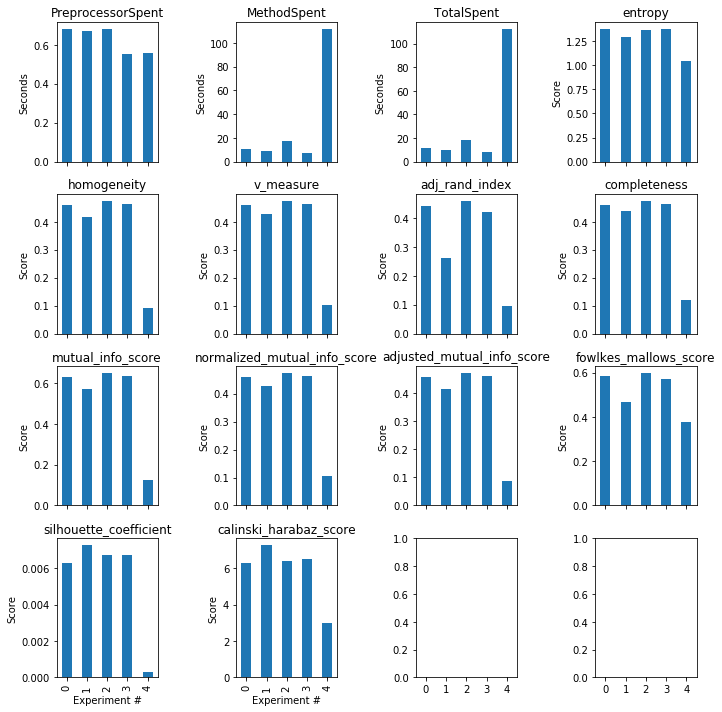

In [11]:
mce.plot_scores()

In [12]:
mce.result.fastest()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
3,3,TF-IDF + braycurtis distance,0.553706,7.089515,7.77035,1.377321,0.463793,0.462698,0.420991,0.461609,0.635783,0.4627,0.460301,0.568925,0.006698,6.493539


As we can see, **Chebyshev distance score** shows the worst results. Besides, it is the slowest one on KMeans algorithm. Now let's try four other measures with different preprocessing logic.

## TfIdfVectorizer with unigrams, bigrams (cosine similarity for KMeans)

In [14]:
tf_idf_uni_bigrams = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(1, 2)).as_preprocess_step()],
    verbose_name='TF-IDF 1,2-grams without stopwords'
)
tf_idf_uni_bigrams_trigrams = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(1, 3)).as_preprocess_step()],
    verbose_name='TF-IDF 1,2,3-grams without stopwords'
)
tf_idf_bigrams = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(2, 2)).as_preprocess_step()],
    verbose_name='TF-IDF 2-grams without stopwords'
)
tf_idf_unigrams = Preprocessor(
    [TfidfVectorizer(stop_words='english').as_preprocess_step()],
    verbose_name='TF-IDF 1-grams without stopwords'
)
tf_idf_trigrams = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(3,3)).as_preprocess_step()],
    verbose_name='TF-IDF 3-grams without stopwords'
)

In [37]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_uni_bigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1,2-grams'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_uni_bigrams_trigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1,2,3-grams'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_bigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='2-grams'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_unigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1-grams'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_trigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='3-grams'
    ),
]
mce2 = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Cosine distance measures on TF-IDF for different N-grams'
)

In [38]:
mce2.run()

Running multi experiment consisting of 5 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "1,2-grams (id=36)"...
Running preprocessing...
Step #0: PreprocessStep (id=1): finished in 2.0244641304 sec
Finished preprocessing in 2.0244641304
Running in-middle prepare function...
Finished in-middle prepare function in 0.322918176651 sec
Running method...
Finished method in 56.4074950218 sec
Finished experiment in 58.7548773289 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "1,2,3-grams (id=37)"...
Running preprocessing...
Step #0: PreprocessStep (id=2): finished in 3.6897008419 sec
Finished preprocessing in 3.6897008419
Running in-middle prepare function...
Finished in-middle prepare function in 0.499138832092 sec
Running method...
Finished method in 130.943852901 sec
Finished experiment in 135.132692575 sec

--------------------------------------------------
*****Experiment #2*

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,36,"1,2-grams",2.024464,56.407495,58.754877
1,37,"1,2,3-grams",3.689701,130.943853,135.132693
2,38,2-grams,1.938545,44.206388,46.655286
3,39,1-grams,0.623235,9.609382,10.403872
4,40,3-grams,1.697779,43.119120,45.301075


In [39]:
mce2.set_true_labels(labels)
mce2.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,36,"1,2-grams",2.024464,56.407495,58.754877,1.378342,0.371168,0.370154,0.351230,0.369146,0.508810,0.370156,0.367615,0.516730
1,37,"1,2,3-grams",3.689701,130.943853,135.132693,1.370592,0.267233,0.267257,0.253153,0.267280,0.366332,0.267257,0.265445,0.444981
2,38,2-grams,1.938545,44.206388,46.655286,1.069349,0.087217,0.097993,0.047362,0.111807,0.119560,0.098749,0.084985,0.368104
3,39,1-grams,0.623235,9.609382,10.403872,1.378678,0.461413,0.460096,0.442040,0.458787,0.632520,0.460098,0.457474,0.584422
4,40,3-grams,1.697779,43.119120,45.301075,0.679631,0.070822,0.094696,0.016289,0.142850,0.097085,0.100583,0.068534,0.426328


In [40]:
mce2.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,36,"1,2-grams",2.024464,56.407495,58.754877,1.378342,0.371168,0.370154,0.351230,0.369146,0.508810,0.370156,0.367615,0.516730,0.003817,4.137396
1,37,"1,2,3-grams",3.689701,130.943853,135.132693,1.370592,0.267233,0.267257,0.253153,0.267280,0.366332,0.267257,0.265445,0.444981,0.002705,3.228069
2,38,2-grams,1.938545,44.206388,46.655286,1.069349,0.087217,0.097993,0.047362,0.111807,0.119560,0.098749,0.084985,0.368104,0.001995,2.765770
3,39,1-grams,0.623235,9.609382,10.403872,1.378678,0.461413,0.460096,0.442040,0.458787,0.632520,0.460098,0.457474,0.584422,0.006268,6.273633
4,40,3-grams,1.697779,43.119120,45.301075,0.679631,0.070822,0.094696,0.016289,0.142850,0.097085,0.100583,0.068534,0.426328,0.001816,2.514494


In [29]:
tf_idf_bi_trigrams = Preprocessor(
    [TfidfVectorizer(stop_words='english', ngram_range=(2, 3)).as_preprocess_step()],
    verbose_name='TF-IDF 2,3-grams without stopwords'
)

by_tri_grams = ClusteringExperiment(
    method=KMeansClusterer(
        4,
        distance=cosine,
        rng=Random(15),
        verbose_name='K means with cosine distance'
    ),
    preprocessor=tf_idf_bi_trigrams,
    prepare_func=lambda d: d.todense(),
    verbose_name='2,3-grams'
)

In [31]:
by_tri_grams.set_input_data(dataset.data)
by_tri_grams.run()

Running experiment "2,3-grams (id=26)"...
Running preprocessing...
Step #0: PreprocessStep (id=6): finished in 3.07841897011 sec
Finished preprocessing in 3.07841897011
Running in-middle prepare function...
Finished in-middle prepare function in 0.455888032913 sec
Running method...
Finished method in 93.5231668949 sec
Finished experiment in 97.0574738979 sec


,ExperimentID,ExperimentName,MethodSpent,PrepareFuncSpent,PreprocessorSpent,TotalSpent
0,26,"2,3-grams",93.523167,0.455888,3.078419,97.057474


In [33]:
by_tri_grams.set_true_labels(labels)
by_tri_grams.compute_scores()

,ExperimentID,ExperimentName,MethodSpent,PrepareFuncSpent,PreprocessorSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,26,"2,3-grams",93.523167,0.455888,3.078419,97.057474,1.057682,0.086875,0.098078,0.045212,0.112597,0.119092,0.098904,0.084642,0.369201


In [34]:
by_tri_grams.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,MethodSpent,PrepareFuncSpent,PreprocessorSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,26,"2,3-grams",93.523167,0.455888,3.078419,97.057474,1.057682,0.086875,0.098078,0.045212,0.112597,0.119092,0.098904,0.084642,0.369201,0.001805,2.564722


## Test on different random generators

In [41]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(30),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_uni_bigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1,2-grams random 30'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(30),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_unigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1-grams random 30'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(40),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_uni_bigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1,2-grams random 40'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(40),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_unigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1-grams random 40'
    ),
        ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(123),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_uni_bigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1,2-grams random 123'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(123),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=tf_idf_unigrams,
        prepare_func=lambda d: d.todense(),
        verbose_name='1-grams random 123'
    )
]
mce3 = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Different N-grams and different random generators'
)

In [42]:
mce3.run()

Running multi experiment consisting of 6 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "1,2-grams random 30 (id=41)"...
Running preprocessing...
Step #0: PreprocessStep (id=1): finished in 2.27466392517 sec
Finished preprocessing in 2.27466392517
Running in-middle prepare function...
Finished in-middle prepare function in 0.259859085083 sec
Running method...
Finished method in 112.024924994 sec
Finished experiment in 114.559448004 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "3-grams random 30 (id=42)"...
Running preprocessing...
Step #0: PreprocessStep (id=4): finished in 0.524891138077 sec
Finished preprocessing in 0.524891138077
Running in-middle prepare function...
Finished in-middle prepare function in 0.108711957932 sec
Running method...
Finished method in 16.3695218563 sec
Finished experiment in 17.0031249523 sec

------------------------------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,41,"1,2-grams random 30",2.274664,112.024925,114.559448
1,42,3-grams random 30,0.524891,16.369522,17.003125
2,43,"1,2-grams random 40",2.015310,92.341566,94.655885
3,44,1-grams random 40,0.629336,6.128518,6.920079
4,45,"1,2-grams random 123",2.107416,52.692846,55.281286
5,46,1-grams random 123,0.651433,13.470921,14.347093


In [43]:
mce3.set_true_labels(labels)
mce3.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,41,"1,2-grams random 30",2.274664,112.024925,114.559448,1.373158,0.371629,0.371314,0.376741,0.371000,0.509442,0.371314,0.369468,0.536542
1,42,3-grams random 30,0.524891,16.369522,17.003125,1.380269,0.496299,0.494597,0.509903,0.492907,0.680344,0.494600,0.491678,0.634730
2,43,"1,2-grams random 40",2.015310,92.341566,94.655885,1.309465,0.410760,0.420165,0.393118,0.430011,0.563084,0.420275,0.409322,0.559236
3,44,1-grams random 40,0.629336,6.128518,6.920079,1.322589,0.554273,0.564201,0.543004,0.574491,0.759816,0.564292,0.553185,0.666236
4,45,"1,2-grams random 123",2.107416,52.692846,55.281286,1.364358,0.392109,0.393038,0.387705,0.393971,0.537517,0.393039,0.390626,0.546078
5,46,1-grams random 123,0.651433,13.470921,14.347093,1.368985,0.544769,0.545136,0.556926,0.545505,0.746788,0.545137,0.543658,0.670942


As we can see, for different random generators unigrams are still dominating.

Now let's try to add some constraints for df:

In [44]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.5, min_df=2
            ).as_preprocess_step()],
            verbose_name='TF-IDF max_df=0.5, min_df=2'
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.5, min_df=2'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.5, min_df=4
            ).as_preprocess_step()],
            verbose_name='TF-IDF max_df=0.5, min_df=4'
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.5, min_df=4'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=2
            ).as_preprocess_step()],
            verbose_name='TF-IDF max_df=0.7, min_df=2'
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=2'
    ),
        ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english', max_df=0.7, min_df=4
            ).as_preprocess_step()],
            verbose_name='TF-IDF max_df=0.7, min_df=4'
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max_df=0.7, min_df=4'
    ),
]
mce4 = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Different df constraints'
)

In [46]:
mce4.run()

Running multi experiment consisting of 4 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "max_df=0.5, min_df=2 (id=47)"...
Running preprocessing...
Step #0: PreprocessStep (id=7): finished in 0.637449979782 sec
Finished preprocessing in 0.637449979782
Running in-middle prepare function...
Finished in-middle prepare function in 0.0977840423584 sec
Running method...
Finished method in 5.63232493401 sec
Finished experiment in 6.36755895615 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "max_df=0.5, min_df=4 (id=48)"...
Running preprocessing...
Step #0: PreprocessStep (id=8): finished in 0.578524112701 sec
Finished preprocessing in 0.578524112701
Running in-middle prepare function...
Finished in-middle prepare function in 0.0798070430756 sec
Running method...
Finished method in 4.62919807434 sec
Finished experiment in 5.28752923012 sec

----------------------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,47,"max_df=0.5, min_df=2",0.637450,5.632325,6.367559
1,48,"max_df=0.5, min_df=4",0.578524,4.629198,5.287529
2,49,"max_df=0.7, min_df=2",0.940732,6.032296,7.202668
3,50,"max_df=0.7, min_df=4",0.599625,12.240680,12.915978


In [47]:
mce4.set_true_labels(labels)
mce4.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,47,"max_df=0.5, min_df=2",0.637450,5.632325,6.367559,1.365476,0.546762,0.547833,0.564343,0.548908,0.749520,0.547834,0.545656,0.676811
1,48,"max_df=0.5, min_df=4",0.578524,4.629198,5.287529,1.376902,0.554983,0.553757,0.582681,0.552537,0.760789,0.553759,0.551450,0.689279
2,49,"max_df=0.7, min_df=2",0.940732,6.032296,7.202668,1.364468,0.542518,0.543781,0.562616,0.545049,0.743702,0.543782,0.541402,0.675629
3,50,"max_df=0.7, min_df=4",0.599625,12.240680,12.915978,1.381962,0.543086,0.540890,0.564575,0.538712,0.744480,0.540895,0.537596,0.675302


In [49]:
mce4.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,47,"max_df=0.5, min_df=2",0.637450,5.632325,6.367559,1.365476,0.546762,0.547833,0.564343,0.548908,0.749520,0.547834,0.545656,0.676811,0.006982,6.855316
1,48,"max_df=0.5, min_df=4",0.578524,4.629198,5.287529,1.376902,0.554983,0.553757,0.582681,0.552537,0.760789,0.553759,0.551450,0.689279,0.008359,8.081331
2,49,"max_df=0.7, min_df=2",0.940732,6.032296,7.202668,1.364468,0.542518,0.543781,0.562616,0.545049,0.743702,0.543782,0.541402,0.675629,0.006902,6.887757
3,50,"max_df=0.7, min_df=4",0.599625,12.240680,12.915978,1.381962,0.543086,0.540890,0.564575,0.538712,0.744480,0.540895,0.537596,0.675302,0.008636,8.286519


Hm, it looks like these constraints on df help a lot. Now let's try to check what happens if we do not remove stopwords.

In [55]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='without stopwords: random 15'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='with stopwords: random 15'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(30),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='without stopwords: random 30'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(30),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='with stopwords: random 30'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(40),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='without stopwords: random 40'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(40),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='with stopwords: random 40'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(550),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='without stopwords: random 550'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(550),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='with stopwords: random 550'
    )
]
mce5 = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='with or without stopwords'
)

In [56]:
mce5.run()

Running multi experiment consisting of 8 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "without stopwords: random 15 (id=55)"...
Running preprocessing...
Step #0: PreprocessStep (id=15): finished in 0.636009931564 sec
Finished preprocessing in 0.636009931564
Running in-middle prepare function...
Finished in-middle prepare function in 0.131206035614 sec
Running method...
Finished method in 4.74206519127 sec
Finished experiment in 5.50928115845 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "with stopwords: random 15 (id=56)"...
Running preprocessing...
Step #0: PreprocessStep (id=16): finished in 0.694863080978 sec
Finished preprocessing in 0.694863080978
Running in-middle prepare function...
Finished in-middle prepare function in 0.106560945511 sec
Running method...
Finished method in 6.15979719162 sec
Finished experiment in 6.96122121811 sec

---------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,55,without stopwords: random 15,0.636010,4.742065,5.509281
1,56,with stopwords: random 15,0.694863,6.159797,6.961221
2,57,without stopwords: random 30,0.581665,15.601638,16.305019
3,58,with stopwords: random 30,0.686069,4.963041,5.713648
4,59,without stopwords: random 40,0.699734,6.801318,7.571340
5,60,with stopwords: random 40,0.695651,5.477547,6.285559
6,61,without stopwords: random 550,0.601029,9.050438,9.708920
7,62,with stopwords: random 550,0.979423,10.016679,11.208574


In [57]:
mce5.set_true_labels(labels)
mce5.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,55,without stopwords: random 15,0.636010,4.742065,5.509281,1.376902,0.554983,0.553757,0.582681,0.552537,0.760789,0.553759,0.551450,0.689279
1,56,with stopwords: random 15,0.694863,6.159797,6.961221,1.321010,0.520042,0.529667,0.526984,0.539656,0.712891,0.529758,0.518870,0.654124
2,57,without stopwords: random 30,0.581665,15.601638,16.305019,1.325337,0.495017,0.503371,0.516629,0.512011,0.678587,0.503442,0.493785,0.645907
3,58,with stopwords: random 30,0.686069,4.963041,5.713648,1.171782,0.246369,0.265657,0.157991,0.288220,0.337732,0.266475,0.244528,0.422099
4,59,without stopwords: random 40,0.699734,6.801318,7.571340,1.305179,0.560631,0.574386,0.549661,0.588832,0.768532,0.574559,0.559558,0.672812
5,60,with stopwords: random 40,0.695651,5.477547,6.285559,1.259473,0.569239,0.593340,0.566578,0.619571,0.780333,0.593872,0.568187,0.689604
6,61,without stopwords: random 550,0.601029,9.050438,9.708920,1.311808,0.507328,0.518491,0.506885,0.530155,0.695462,0.518616,0.506125,0.641200
7,62,with stopwords: random 550,0.979423,10.016679,11.208574,1.267168,0.513631,0.533816,0.494002,0.555651,0.704103,0.534228,0.512443,0.638294


In [59]:
mce5.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,55,without stopwords: random 15,0.636010,4.742065,5.509281,1.376902,0.554983,0.553757,0.582681,0.552537,0.760789,0.553759,0.551450,0.689279,0.008359,8.081331
1,56,with stopwords: random 15,0.694863,6.159797,6.961221,1.321010,0.520042,0.529667,0.526984,0.539656,0.712891,0.529758,0.518870,0.654124,0.009133,9.015224
2,57,without stopwords: random 30,0.581665,15.601638,16.305019,1.325337,0.495017,0.503371,0.516629,0.512011,0.678587,0.503442,0.493785,0.645907,0.008872,7.953085
3,58,with stopwords: random 30,0.686069,4.963041,5.713648,1.171782,0.246369,0.265657,0.157991,0.288220,0.337732,0.266475,0.244528,0.422099,0.006299,7.176173
4,59,without stopwords: random 40,0.699734,6.801318,7.571340,1.305179,0.560631,0.574386,0.549661,0.588832,0.768532,0.574559,0.559558,0.672812,0.009158,8.279757
5,60,with stopwords: random 40,0.695651,5.477547,6.285559,1.259473,0.569239,0.593340,0.566578,0.619571,0.780333,0.593872,0.568187,0.689604,0.010589,9.683501
6,61,without stopwords: random 550,0.601029,9.050438,9.708920,1.311808,0.507328,0.518491,0.506885,0.530155,0.695462,0.518616,0.506125,0.641200,0.009428,8.244097
7,62,with stopwords: random 550,0.979423,10.016679,11.208574,1.267168,0.513631,0.533816,0.494002,0.555651,0.704103,0.534228,0.512443,0.638294,0.009939,8.802760


It's hard to say which strategy is better, but there is at least one case (random seed - 30) when not removing stop words negatively affected scores)

Now let's try to set a constraint for max number of features.

In [67]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                max_features=1100,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max features: 1100'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                max_features=1000,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max features: 1000'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                max_features=900,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max features: 1000'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                max_features=800,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='max features: 800'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='all features'
    ),
]
mce6 = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='max features constraint'
)

In [68]:
mce6.run()

Running multi experiment consisting of 5 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "max features: 1100 (id=63)"...
Running preprocessing...
Step #0: PreprocessStep (id=23): finished in 0.637533903122 sec
Finished preprocessing in 0.637533903122
Running in-middle prepare function...
Finished in-middle prepare function in 0.0105481147766 sec
Running method...
Finished method in 6.70537590981 sec
Finished experiment in 7.3534579277 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "max features: 1000 (id=64)"...
Running preprocessing...
Step #0: PreprocessStep (id=24): finished in 0.646743059158 sec
Finished preprocessing in 0.646743059158
Running in-middle prepare function...
Finished in-middle prepare function in 0.00774717330933 sec
Running method...
Finished method in 5.32763910294 sec
Finished experiment in 5.9821293354 sec

-------------------------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,63,max features: 1100,0.637534,6.705376,7.353458
1,64,max features: 1000,0.646743,5.327639,5.982129
2,65,max features: 1000,0.995196,8.777958,9.779538
3,66,max features: 800,0.634835,5.291071,5.931849
4,67,all features,0.827260,7.024539,7.932244


In [69]:
mce6.set_true_labels(labels)
mce6.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,63,max features: 1100,0.637534,6.705376,7.353458,1.371079,0.518858,0.518812,0.514757,0.518766,0.711269,0.518812,0.517592,0.639413
1,64,max features: 1000,0.646743,5.327639,5.982129,1.363844,0.495299,0.496565,0.492840,0.497837,0.678972,0.496566,0.494067,0.624019
2,65,max features: 1000,0.995196,8.777958,9.779538,1.327395,0.472821,0.480433,0.475584,0.488294,0.648160,0.480496,0.471534,0.616056
3,66,max features: 800,0.634835,5.291071,5.931849,1.357094,0.479664,0.482080,0.471534,0.484521,0.657540,0.482086,0.478395,0.609143
4,67,all features,0.827260,7.024539,7.932244,1.376902,0.554983,0.553757,0.582681,0.552537,0.760789,0.553759,0.551450,0.689279


It's obvious that we have a small number of features, so we do not need to decrease the number of them. But we can try to use stemming or lemmatization.

In [77]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
default_analyzer = TfidfVectorizer().build_analyzer()

def stem_snowball(doc):
    stemmer = SnowballStemmer('english')
    return (stemmer.stem(w) for w in default_analyzer(doc))

def stem_lancaster(doc):
    stemmer = LancasterStemmer()
    return (stemmer.stem(w) for w in default_analyzer(doc))

def lemmatizer(doc):
    lemmatizer = WordNetLemmatizer()
    return (lemmatizer.lemmatize(w) for w in default_analyzer(doc))

In [81]:
experiments = [
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                analyzer=stem_snowball,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='snowball stemmer: random 15'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                analyzer=stem_lancaster,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='lancaster stemmer: random 15'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                analyzer=lemmatizer, 
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='lemmatizer: random 15'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(15),
            verbose_name='K means with cosine distance: random 15'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='without stemming or lemmatization: random 15'
    ),
        ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(150),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                analyzer=stem_snowball,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='snowball stemmer: random 150'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(150),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                analyzer=stem_lancaster,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='lancaster stemmer: random 150'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(150),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
                analyzer=lemmatizer, 
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='lemmatizer: random 150'
    ),
    ClusteringExperiment(
        method=KMeansClusterer(
            4,
            distance=cosine,
            rng=Random(150),
            verbose_name='K means with cosine distance'
        ),
        preprocessor=Preprocessor(
            [TfidfVectorizer(
                stop_words='english',
                max_df=0.5, min_df=4,
            ).as_preprocess_step()],
        ),
        prepare_func=lambda d: d.todense(),
        verbose_name='without stemming or lemmatization: random 150'
    ),
]
mce7 = MultiClusteringExperiment(
    data=dataset.data,
    experiments=experiments,
    verbose_name='Stemming and lemmatization'
)

In [82]:
mce7.run()

Running multi experiment consisting of 8 sub experiments

--------------------------------------------------
*****Experiment #0*****
Running experiment "snowball stemmer: random 15 (id=78)"...
Running preprocessing...
Step #0: PreprocessStep (id=38): finished in 9.38627719879 sec
Finished preprocessing in 9.38627719879
Running in-middle prepare function...
Finished in-middle prepare function in 0.0405049324036 sec
Running method...
Finished method in 6.64162707329 sec
Finished experiment in 16.0684092045 sec

--------------------------------------------------
*****Experiment #1*****
Running experiment "lancaster stemmer: random 15 (id=79)"...
Running preprocessing...
Step #0: PreprocessStep (id=39): finished in 12.9804520607 sec
Finished preprocessing in 12.9804520607
Running in-middle prepare function...
Finished in-middle prepare function in 0.040864944458 sec
Running method...
Finished method in 7.42194199562 sec
Finished experiment in 20.4432590008 sec

----------------------------

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent
0,78,snowball stemmer: random 15,9.386277,6.641627,16.068409
1,79,lancaster stemmer: random 15,12.980452,7.421942,20.443259
2,80,lemmatizer: random 15,2.817670,5.271838,8.126685
3,81,without stemming or lemmatization: random 15,0.502905,4.084254,4.624284
4,82,snowball stemmer: random 150,8.721982,3.818390,12.574642
5,83,lancaster stemmer: random 150,12.368063,8.686769,21.140669
6,84,lemmatizer: random 150,4.416158,17.027865,21.508705
7,85,without stemming or lemmatization: random 150,0.931254,10.899932,11.933295


In [83]:
mce7.set_true_labels(labels)
mce7.compute_scores()

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score
0,78,snowball stemmer: random 15,9.386277,6.641627,16.068409,1.342346,0.522786,0.528276,0.539044,0.533881,0.716653,0.528305,0.521622,0.660495
1,79,lancaster stemmer: random 15,12.980452,7.421942,20.443259,1.312332,0.540383,0.552165,0.539806,0.564472,0.740775,0.552296,0.539260,0.664363
2,80,lemmatizer: random 15,2.817670,5.271838,8.126685,1.366892,0.522828,0.523581,0.532448,0.524336,0.716710,0.523581,0.521663,0.653001
3,81,without stemming or lemmatization: random 15,0.502905,4.084254,4.624284,1.376902,0.554983,0.553757,0.582681,0.552537,0.760789,0.553759,0.551450,0.689279
4,82,snowball stemmer: random 150,8.721982,3.818390,12.574642,1.356381,0.483424,0.485986,0.392817,0.488575,0.662694,0.485993,0.482163,0.550847
5,83,lancaster stemmer: random 150,12.368063,8.686769,21.140669,1.359440,0.488042,0.490078,0.416531,0.492132,0.669024,0.490083,0.486792,0.567902
6,84,lemmatizer: random 150,4.416158,17.027865,21.508705,1.313894,0.522753,0.533840,0.462038,0.545407,0.716607,0.533960,0.521587,0.607371
7,85,without stemming or lemmatization: random 150,0.931254,10.899932,11.933295,1.372159,0.563754,0.563481,0.591422,0.563209,0.772813,0.563482,0.562145,0.696272


In [84]:
mce7.compute_scores(['silhouette_coefficient', 'calinski_harabaz_score'])

,ExperimentID,ExperimentName,PreprocessorSpent,MethodSpent,TotalSpent,entropy,homogeneity,v_measure,adj_rand_index,completeness,mutual_info_score,normalized_mutual_info_score,adjusted_mutual_info_score,fowlkes_mallows_score,silhouette_coefficient,calinski_harabaz_score
0,78,snowball stemmer: random 15,9.386277,6.641627,16.068409,1.342346,0.522786,0.528276,0.539044,0.533881,0.716653,0.528305,0.521622,0.660495,0.009605,9.895898
1,79,lancaster stemmer: random 15,12.980452,7.421942,20.443259,1.312332,0.540383,0.552165,0.539806,0.564472,0.740775,0.552296,0.539260,0.664363,0.010481,10.339715
2,80,lemmatizer: random 15,2.817670,5.271838,8.126685,1.366892,0.522828,0.523581,0.532448,0.524336,0.716710,0.523581,0.521663,0.653001,0.008938,9.303513
3,81,without stemming or lemmatization: random 15,0.502905,4.084254,4.624284,1.376902,0.554983,0.553757,0.582681,0.552537,0.760789,0.553759,0.551450,0.689279,0.008359,8.081331
4,82,snowball stemmer: random 150,8.721982,3.818390,12.574642,1.356381,0.483424,0.485986,0.392817,0.488575,0.662694,0.485993,0.482163,0.550847,0.009088,9.762396
5,83,lancaster stemmer: random 150,12.368063,8.686769,21.140669,1.359440,0.488042,0.490078,0.416531,0.492132,0.669024,0.490083,0.486792,0.567902,0.009408,10.034150
6,84,lemmatizer: random 150,4.416158,17.027865,21.508705,1.313894,0.522753,0.533840,0.462038,0.545407,0.716607,0.533960,0.521587,0.607371,0.010769,9.695847
7,85,without stemming or lemmatization: random 150,0.931254,10.899932,11.933295,1.372159,0.563754,0.563481,0.591422,0.563209,0.772813,0.563482,0.562145,0.696272,0.008623,8.336861
